# Problem
Accurate and early detection of breast cancer plays a vital role in improving patient outcomes and survival rates. However, existing detection methods often have limitations in terms of accuracy and efficiency.

The aim of this project is to develop an advanced breast cancer detection system using machine learning that can effectively classify breast tissue samples as **malignant** or **benign**, enabling timely intervention and improved patient care.

# Data
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign(non-cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

URL: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [2]:
# researchpy: https://researchpy.readthedocs.io/en/latest/
!pip install researchpy

In [3]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

In [4]:
# Load dataset
data = pd.read_csv('/content/breast-cancer.csv')

In [5]:
# examine first few rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Unnamed: 33
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,NaN


In [6]:
# drop id, unamed: 32, unamed: 33
data = data.drop(['id', 'Unnamed: 32', 'Unnamed: 33'], axis=1)

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploring Data

In [7]:
# check shape of data
data.shape

(569, 31)

In [8]:
# data types
data.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [9]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
# check missing values
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


# Descriptive statistics

In [14]:
# select numeric variables
numeric_variables = data.select_dtypes(exclude ='object')
numeric_variables.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
numeric_variables.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
# summary stats
numeric_variables.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
# summary statistics of numeric variables
rp.summary_cont(numeric_variables)

/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'radius_mean' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'texture_mean' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'perimeter_mean' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
/usr/local/lib/python3.10/dist-packages/researchpy/summary.p

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,radius_mean,569.0,14.1273,3.5240,0.1477,13.8371,14.4175
1,texture_mean,569.0,19.2896,4.3010,0.1803,18.9355,19.6438
2,perimeter_mean,569.0,91.9690,24.2990,1.0187,89.9682,93.9698
3,area_mean,569.0,654.8891,351.9141,14.7530,625.9120,683.8662
4,smoothness_mean,569.0,0.0964,0.0141,0.0006,0.0952,0.0975
5,compactness_mean,569.0,0.1043,0.0528,0.0022,0.1000,0.1087
6,concavity_mean,569.0,0.0888,0.0797,0.0033,0.0822,0.0954
7,concave points_mean,569.0,0.0489,0.0388,0.0016,0.0457,0.0521
8,symmetry_mean,569.0,0.1812,0.0274,0.0011,0.1789,0.1834
9,fractal_dimension_mean,569.0,0.0628,0.0071,0.0003,0.0622,0.0634


In [19]:
# select categorical columns
categorical_variables = data.select_dtypes(include ='object')
categorical_variables.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [20]:
# summary statistics of categorical variables
rp.summary_cat(categorical_variables)

,Variable,Outcome,Count,Percent
0,diagnosis,B,357,62.74
1,,M,212,37.26


In [24]:
data = pd.get_dummies(data, columns=['diagnosis'], drop_first=True)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Correlations

In [25]:
# correlations
data.corr(method="pearson")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


# Skewness

In [26]:
# skew
data.skew()

,0
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concave points_mean,1.171180
symmetry_mean,0.725609
fractal_dimension_mean,1.304489


# Data Visualization

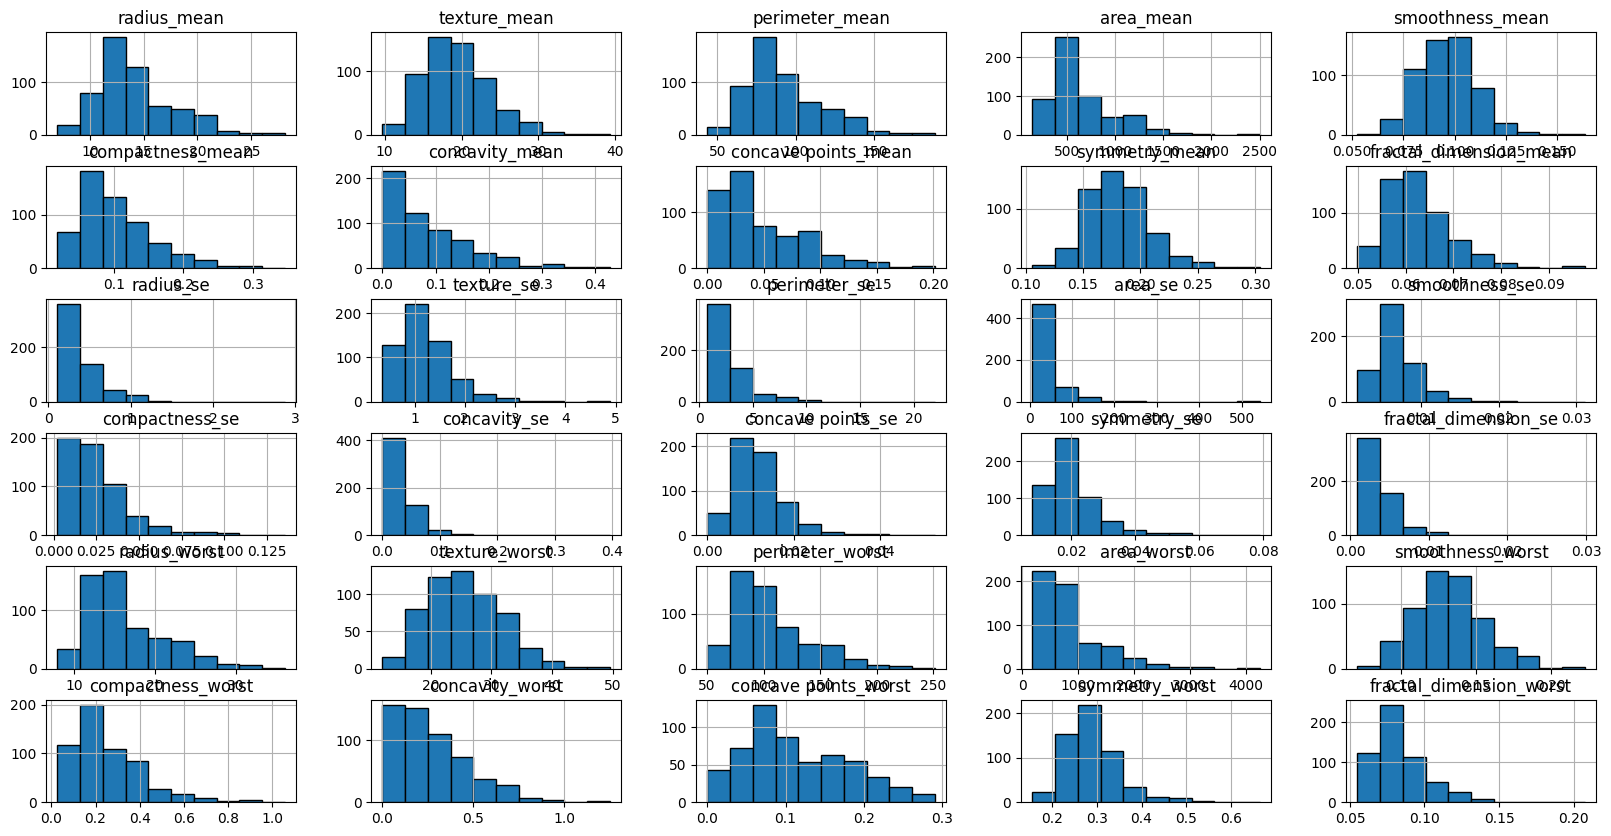

In [28]:
# Univariate visualization with histogram
data.select_dtypes(exclude='object').hist(figsize=(20,10), edgecolor='black')
plt.show()

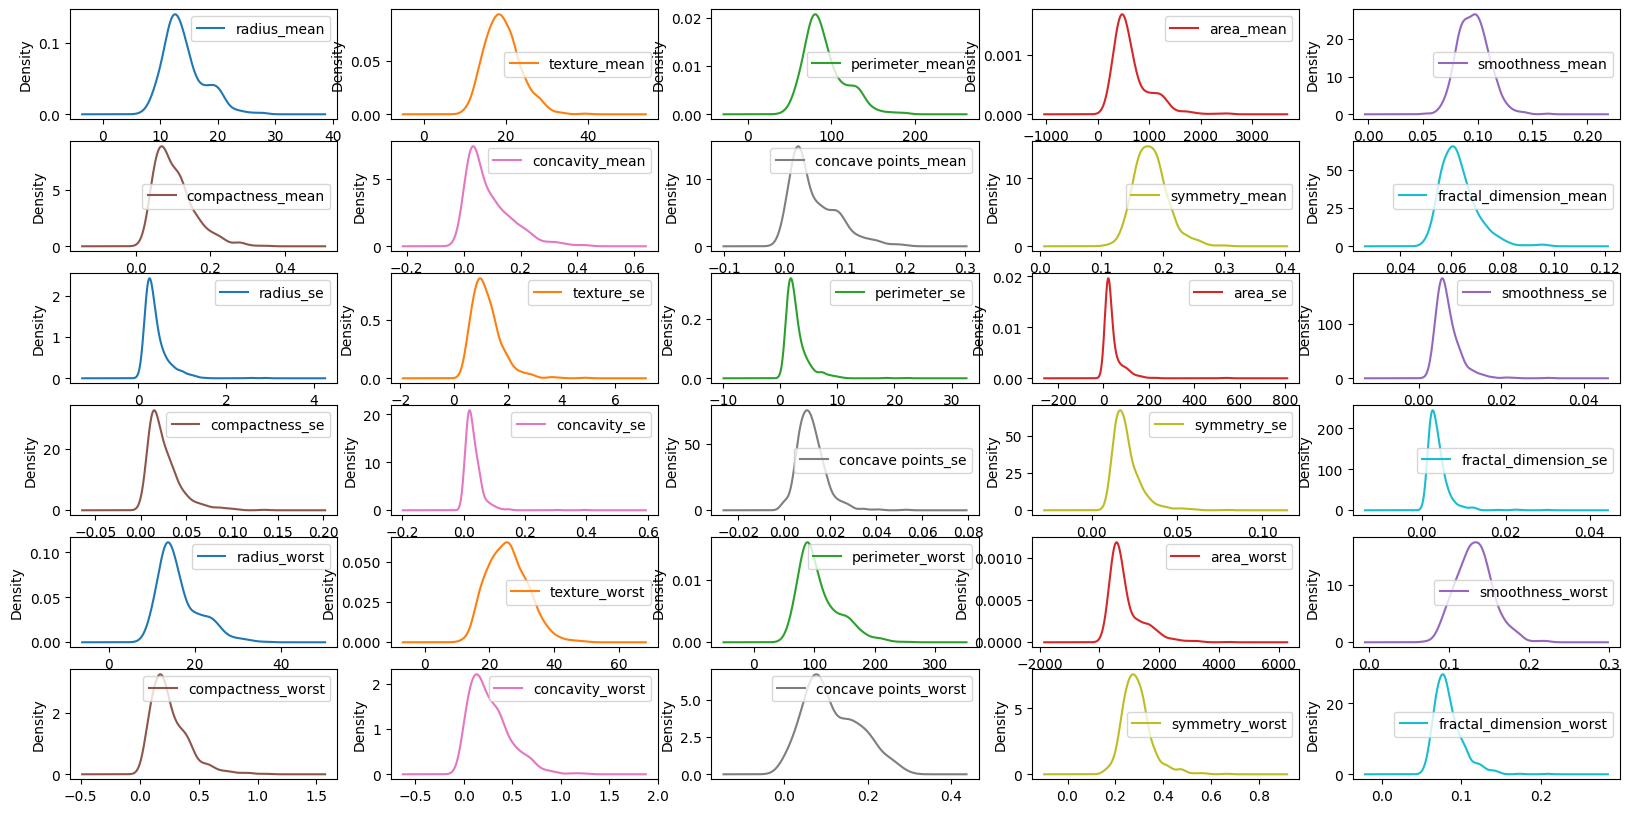

In [32]:
# Univariate distributions with density plot
data.select_dtypes(exclude='object').plot(kind="density", subplots = True, sharex = False, figsize=(20,10), layout=(6,5))
plt.show()

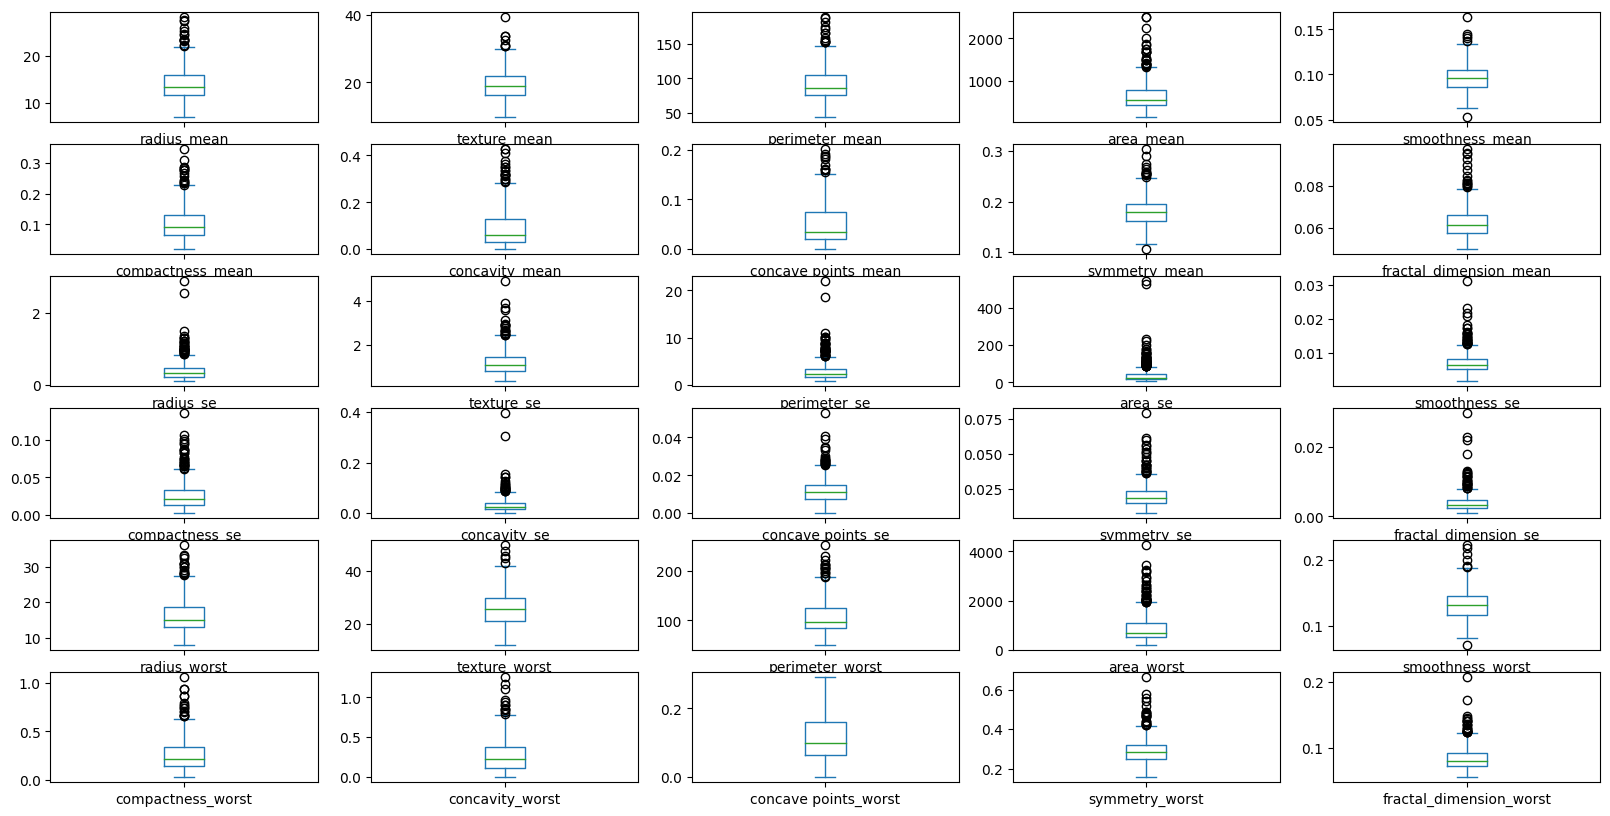

In [33]:
# Univariate distributions with box plots
data.select_dtypes(exclude='object').plot(kind="box", subplots = True, sharex = False, figsize=(20,10), layout=(6,5))
plt.show()

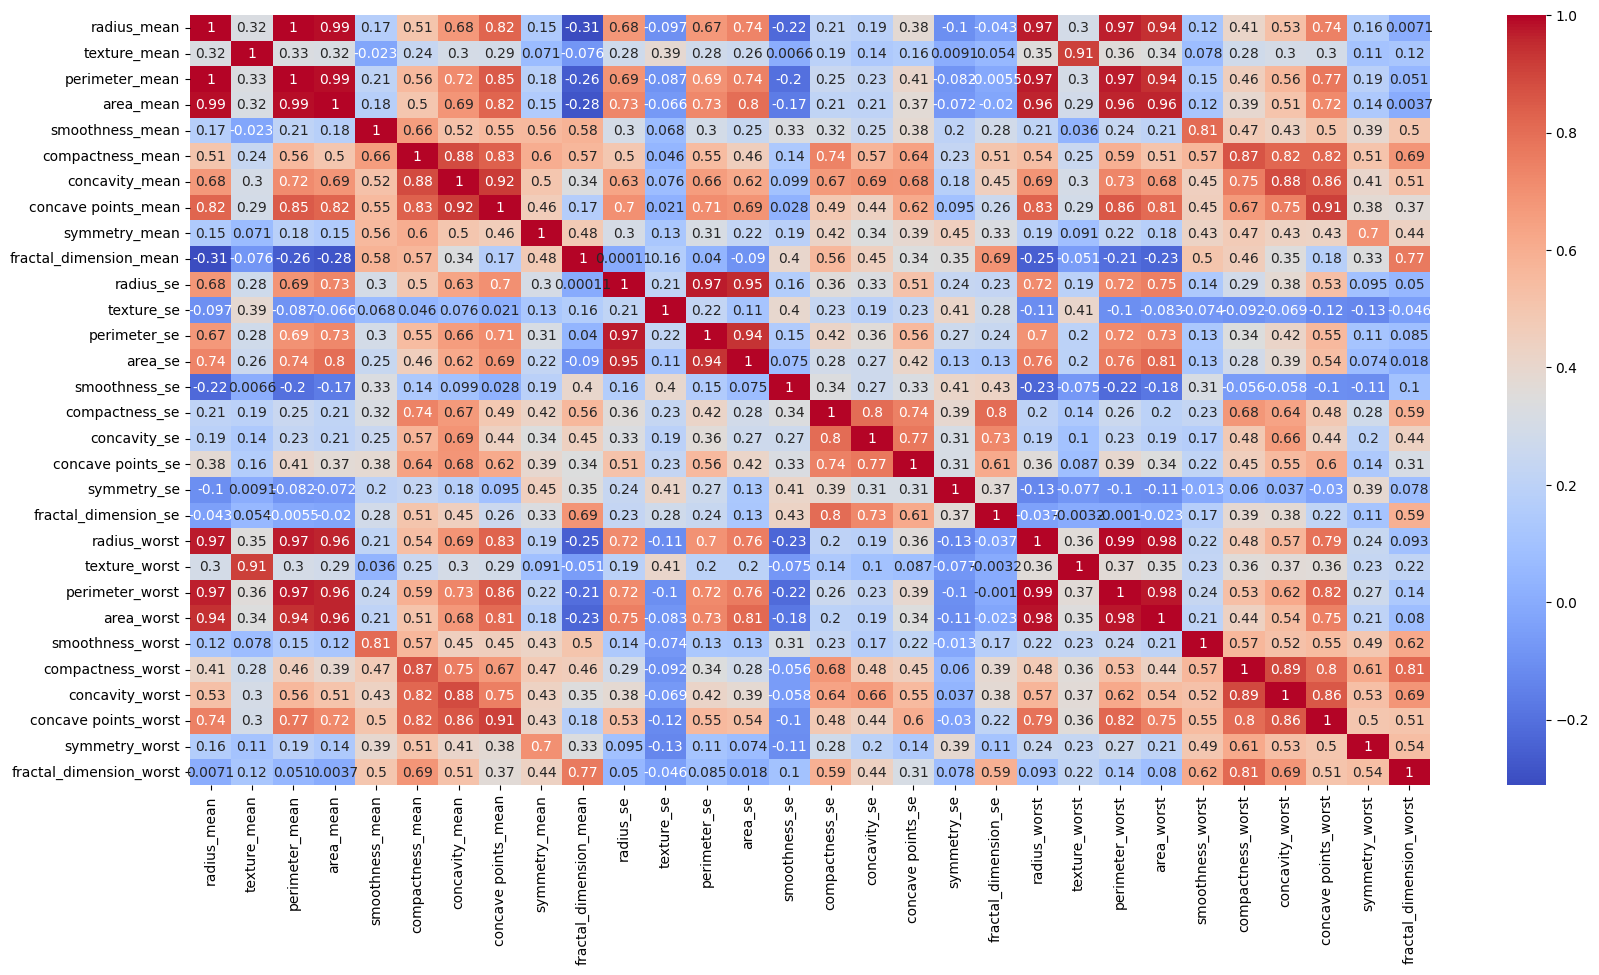

In [37]:
# Multivariate plots with correlations
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

In [43]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
# install full version
!pip install pycaret[full]

In [55]:
!pip install --force-reinstall scipy==1.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.3 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Reason for being yanked: License Violation
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 32.9 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [56]:
!pip install --upgrade scikit-plot

In [61]:
!pip install -q --upgrade pip
!pip install -q pycaret

In [63]:
!pip install scipy==1.11.4

  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.0
    Uninstalling scipy-1.11.0:
      Successfully uninstalled scipy-1.11.0


In [66]:
%pip install scipy==1.11.4

In [68]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-_la_bix6
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-_la_bix6
  Resolved https://github.com/pycaret/pycaret.git to commit 97649adf8965fd02831c14982a48323b6ce7de4c
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of sktime to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 49.7 MB/s eta 0:00:00
  Created wheel for pycaret: filename=pycaret-3.4.0-py3-none-any.whl size=488526 sha256=17fa6678e5f63ca42e642a2012868fd02a74b9650f473da82aeab3c8a2f6d83d
  Stored in directory: /tmp/pip-ephem-wheel-cache-cjnxd4bb/wheels/8f/93/8d/232a8d326f700971d7d53d259970100adbe7901db8b8e0aaff
  Created whee

# Setup

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(data, target='diagnosis', session_id=123)

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 31)"
5,Transformed data shape,"(569, 31)"
6,Transformed train set shape,"(398, 31)"
7,Transformed test set shape,"(171, 31)"
8,Numeric features,30
9,Preprocess,True


In [11]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [13]:
get_config('X')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
62,14.250000,22.150000,96.419998,645.700012,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292,...,17.670000,29.510000,119.099998,959.500000,0.1640,0.6247,0.69220,0.17850,0.2844,0.11320
506,12.220000,20.040001,79.470001,453.100006,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,...,13.160000,24.170000,85.129997,515.299988,0.1402,0.2315,0.35350,0.08088,0.2709,0.08839
227,15.000000,15.510000,97.449997,684.500000,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,...,16.410000,19.309999,114.199997,808.200012,0.1136,0.3627,0.34020,0.13790,0.2954,0.08362
94,15.060000,19.830000,100.300003,705.599976,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,18.230000,24.230000,123.500000,1025.000000,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234
406,16.139999,14.860000,104.300003,800.000000,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.709999,19.580000,115.900002,947.900024,0.1206,0.1722,0.23100,0.11290,0.2778,0.07012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,13.460000,18.750000,87.440002,551.099976,0.10750,0.11380,0.04201,0.03152,0.1723,0.06317,...,15.350000,25.160000,101.900002,719.799988,0.1624,0.3124,0.26540,0.14270,0.3518,0.08665
142,11.430000,17.309999,73.660004,398.000000,0.10920,0.09486,0.02031,0.01861,0.1645,0.06562,...,12.780000,26.760000,82.660004,503.000000,0.1413,0.1792,0.07708,0.06402,0.2584,0.08096
238,14.220000,27.850000,92.550003,623.900024,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.750000,40.540001,102.500000,764.000000,0.1081,0.2426,0.30640,0.08219,0.1890,0.07796
106,11.640000,18.330000,75.169998,412.500000,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140000,29.260000,85.510002,521.700012,0.1688,0.2660,0.28730,0.12180,0.2806,0.09097


In [15]:
get_config('y')

,diagnosis
62,M
506,B
227,B
94,M
406,B
...,...
526,B
142,B
238,B
106,B


In [16]:
get_config('X_train')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
62,14.250000,22.150000,96.419998,645.700012,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292,...,17.670000,29.510000,119.099998,959.500000,0.1640,0.6247,0.69220,0.17850,0.2844,0.11320
506,12.220000,20.040001,79.470001,453.100006,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,...,13.160000,24.170000,85.129997,515.299988,0.1402,0.2315,0.35350,0.08088,0.2709,0.08839
227,15.000000,15.510000,97.449997,684.500000,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,...,16.410000,19.309999,114.199997,808.200012,0.1136,0.3627,0.34020,0.13790,0.2954,0.08362
94,15.060000,19.830000,100.300003,705.599976,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,18.230000,24.230000,123.500000,1025.000000,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234
406,16.139999,14.860000,104.300003,800.000000,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.709999,19.580000,115.900002,947.900024,0.1206,0.1722,0.23100,0.11290,0.2778,0.07012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,16.650000,21.379999,110.000000,904.599976,0.11210,0.14570,0.15250,0.09170,0.1995,0.06330,...,26.459999,31.559999,177.000000,2215.000000,0.1805,0.3578,0.46950,0.20950,0.3613,0.09564
326,14.110000,12.880000,90.029999,616.500000,0.09309,0.05306,0.01765,0.02733,0.1373,0.05700,...,15.530000,18.000000,98.400002,749.900024,0.1281,0.1109,0.05307,0.05890,0.2100,0.07083
280,19.160000,26.600000,126.199997,1138.000000,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.719999,35.900002,159.800003,1724.000000,0.1782,0.3841,0.57540,0.18720,0.3258,0.09720
474,10.880000,15.620000,70.410004,358.899994,0.10070,0.10690,0.05115,0.01571,0.1861,0.06837,...,11.940000,19.350000,80.779999,433.100006,0.1332,0.3898,0.33650,0.07966,0.2581,0.10800


In [10]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9673,0.9961,0.9673,0.9691,0.9669,0.9287,0.9313,0.3730
ada,Ada Boost Classifier,0.9622,0.9911,0.9622,0.9647,0.9621,0.9187,0.9215,0.3360
catboost,CatBoost Classifier,0.9622,0.9950,0.9622,0.9650,0.9620,0.9184,0.9217,10.4080
lda,Linear Discriminant Analysis,0.9599,0.9920,0.9599,0.9635,0.9589,0.9112,0.9165,0.1400
lightgbm,Light Gradient Boosting Machine,0.9599,0.9926,0.9599,0.9619,0.9594,0.9127,0.9156,0.6050
qda,Quadratic Discriminant Analysis,0.9571,0.9970,0.9571,0.9588,0.9571,0.9080,0.9097,0.0470
gbc,Gradient Boosting Classifier,0.9547,0.9918,0.9547,0.9582,0.9547,0.9033,0.9068,0.5530
rf,Random Forest Classifier,0.9546,0.9939,0.9546,0.9584,0.9547,0.9034,0.9070,0.3750
lr,Logistic Regression,0.9523,0.9923,0.9523,0.9554,0.9517,0.8963,0.9005,1.0170
xgboost,Extreme Gradient Boosting,0.9522,0.9889,0.9522,0.9566,0.9519,0.8970,0.9020,0.2150


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [17]:
# create model
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9500,0.9853,0.9500,0.9537,0.9492,0.8904,0.8958
2,0.9250,1.0000,0.9250,0.9330,0.9230,0.8333,0.8452
3,0.9500,1.0000,0.9500,0.9537,0.9492,0.8904,0.8958
4,0.9750,1.0000,0.9750,0.9760,0.9748,0.9459,0.9473
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9500,0.9960,0.9500,0.9500,0.9500,0.8933,0.8933
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9487,0.9800,0.9487,0.9487,0.9487,0.8886,0.8886


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
# print model parameters
print(model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [19]:
# tune hyperparameters
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,1.0000,0.9500,0.9559,0.9505,0.8961,0.9010
1,0.9500,0.9733,0.9500,0.9537,0.9492,0.8904,0.8958
2,0.9750,1.0000,0.9750,0.9760,0.9748,0.9459,0.9473
3,0.9500,0.9973,0.9500,0.9537,0.9492,0.8904,0.8958
4,0.9750,1.0000,0.9750,0.9760,0.9748,0.9459,0.9473
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9750,0.9973,0.9750,0.9766,0.9751,0.9474,0.9487
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8974,0.9800,0.8974,0.9048,0.8987,0.7839,0.7885


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
# to access the tuner object can set return_tuner = True
tuned_model, tuner = tune_model(model, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,1.0000,0.9500,0.9559,0.9505,0.8961,0.9010
1,0.9500,0.9733,0.9500,0.9537,0.9492,0.8904,0.8958
2,0.9750,1.0000,0.9750,0.9760,0.9748,0.9459,0.9473
3,0.9500,0.9973,0.9500,0.9537,0.9492,0.8904,0.8958
4,0.9750,1.0000,0.9750,0.9760,0.9748,0.9459,0.9473
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9750,0.9973,0.9750,0.9766,0.9751,0.9474,0.9487
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8974,0.9800,0.8974,0.9048,0.8987,0.7839,0.7885


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [21]:
tuned_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [22]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['radius_mean',
                                                                          'texture_mean',
                                                                          'p...
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                           210,
                                                                           220,
                                                                           230,
                                                                           240,
                                                                           250,
                                                                           260,
                                                                           270,
                                                                           2

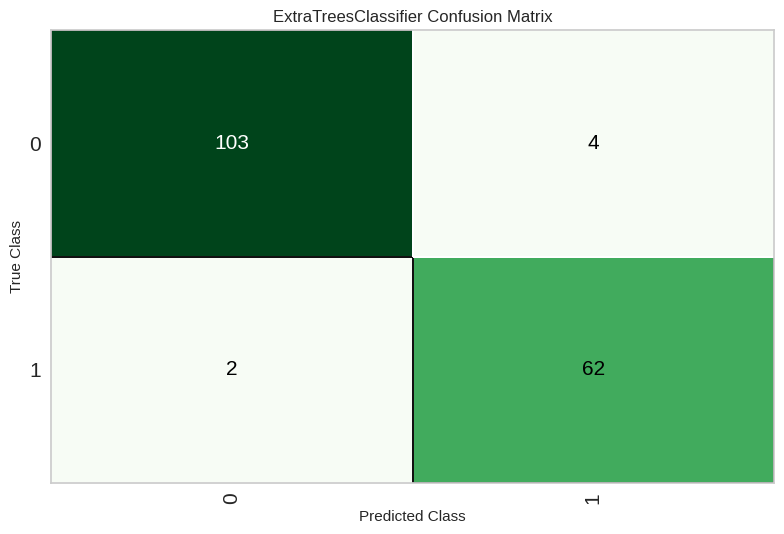

In [23]:
# plot confusion matrix
plot_model(tuned_model, plot='confusion_matrix')

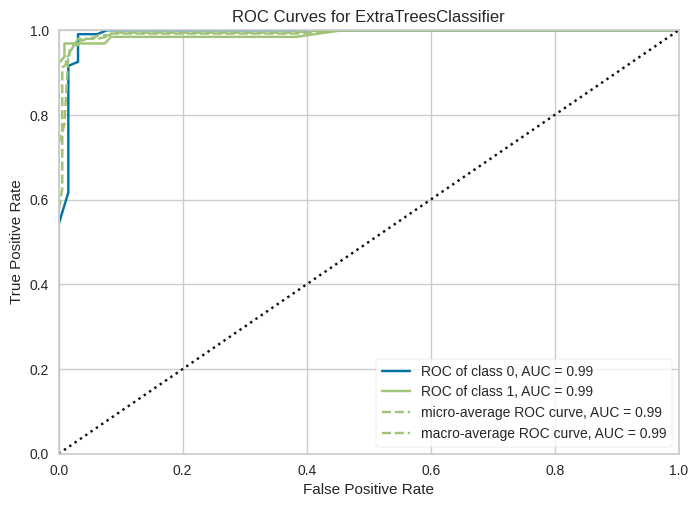

In [24]:
# plot AUC
plot_model(tuned_model, plot='auc')

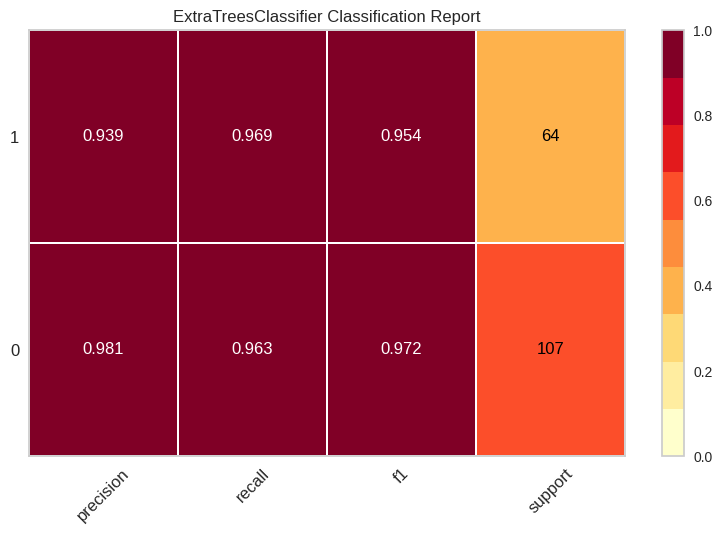

In [25]:
# plot class report
plot_model(tuned_model, plot='class_report')

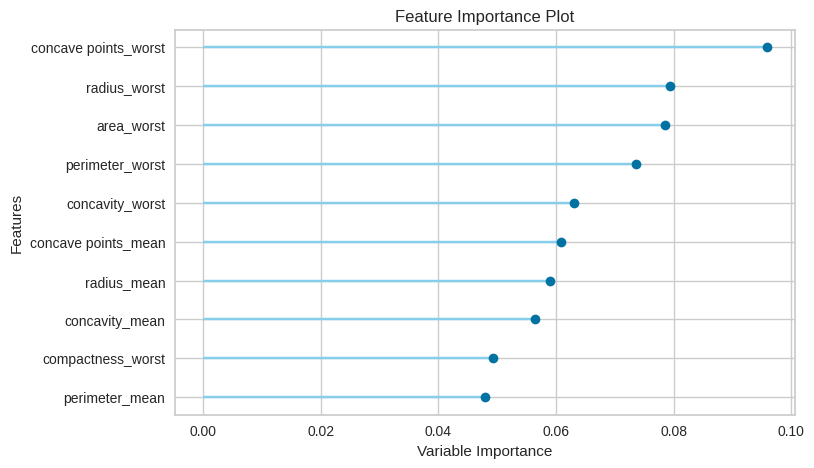

In [26]:
# plot featurer importance
plot_model(tuned_model, plot='feature')

In [27]:
# evaluate model
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [28]:
# finalize the model
final_model = finalize_model(tuned_model)

In [29]:
# predict on test set
pred = predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [30]:
# show predictions
pred.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,prediction_label,prediction_score
115,11.930000,21.530001,76.529999,438.600006,0.09768,0.07849,0.03328,0.02008,0.1688,0.06194,...,583.000000,0.15000,0.2399,0.15030,0.07247,0.2438,0.08541,B,B,1.0
21,9.504000,12.440000,60.340000,273.899994,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,314.899994,0.13240,0.1148,0.08867,0.06227,0.2450,0.07773,B,B,1.0
382,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,...,488.399994,0.08799,0.3214,0.29120,0.10920,0.2191,0.09349,B,B,1.0
136,11.710000,16.670000,74.720001,423.600006,0.10510,0.06095,0.03592,0.02600,0.1339,0.05945,...,546.700012,0.12710,0.1028,0.10460,0.06968,0.1712,0.07343,B,B,1.0
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,1709.000000,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758,M,M,1.0


In [31]:
# copy data and drop target variables
new_data = data.copy()
new_data = new_data.drop(['diagnosis'], axis=1)
new_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
# predictions model on new_data
pred_new = predict_model(final_model, data=new_data)
pred_new.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediction_label,prediction_score
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.600006,2019.000000,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M,1.0
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.800003,1956.000000,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,1.0
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.500000,1709.000000,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,1.0
3,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.870003,567.700012,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,1.0
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.199997,1575.000000,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,1.0


In [33]:
# save pipeline
save_model(final_model, 'breast_cancer_clf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['radius_mean', 'texture_mean',
                                              'perimeter_mean', 'area_mean',
                                              'smoothness_mean',
                                              'compactness_mean',
                                              'concavity_mean',
                                              'concave points_mean',
                                              'symmet...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max

In [34]:
loaded_model = load_model('breast_cancer_clf')

Transformation Pipeline and Model Successfully Loaded


In [35]:
pred_new = predict_model(loaded_model, data=new_data)
pred_new.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediction_label,prediction_score
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.600006,2019.000000,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M,1.0
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.800003,1956.000000,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,1.0
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.500000,1709.000000,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,1.0
3,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.870003,567.700012,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,1.0
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.199997,1575.000000,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,1.0
